**Heart** **Disease** **Dataset**

Age: The individual's age.

Gender: The individual's gender (Male or Female).

Blood Pressure: The individual's blood pressure (systolic).

Cholesterol Level: The individual's total cholesterol level.

Exercise Habits: The individual's exercise habits (Low, Medium, High).

Smoking: Whether the individual smokes or not (Yes or No).

Family Heart Disease: Whether there is a family history of heart disease (Yes or No).

Diabetes: Whether the individual has diabetes (Yes or No).

BMI: The individual's body mass index.

High Blood Pressure: Whether the individual has high blood pressure (Yes or No).

Low HDL Cholesterol: Whether the individual has low HDL cholesterol (Yes or No).

High LDL Cholesterol: Whether the individual has high LDL cholesterol (Yes or No).

Alcohol Consumption: The individual's alcohol consumption level (None, Low, Medium, High).

Stress Level: The individual's stress level (Low, Medium, High).

Sleep Hours: The number of hours the individual sleeps.

Sugar Consumption: The individual's sugar consumption level (Low, Medium, High).

Triglyceride Level: The individual's triglyceride level.

Fasting Blood Sugar: The individual's fasting blood sugar level.

CRP Level: The C-reactive protein level (a marker of inflammation).

Homocysteine Level: The individual's homocysteine level (an amino acid that affects blood vessel health).

Heart Disease Status: The individual's heart disease status (Yes or No).

## Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [16]:
df = pd.read_csv ("heart_disease.csv")

## Data Preprocessing

In [17]:
#show the first 5 rows
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [18]:
#Display general information about the DataFrame (columns, non-null counts, data types, and memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [19]:
df.shape #DataFrame dimensions (rows, columns)

(10000, 21)

In [20]:
#Statistical summary of DataFrame
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [21]:
#Count of duplicated rows in DataFrame
df.duplicated().sum()

np.int64(0)

In [22]:
#Count of missing values per column
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [23]:
#Percentage of missing values per column
null_percentages = (df.isnull().sum() / len(df)) * 100
print(null_percentages)

Age                      0.29
Gender                   0.19
Blood Pressure           0.19
Cholesterol Level        0.30
Exercise Habits          0.25
Smoking                  0.25
Family Heart Disease     0.21
Diabetes                 0.30
BMI                      0.22
High Blood Pressure      0.26
Low HDL Cholesterol      0.25
High LDL Cholesterol     0.26
Alcohol Consumption     25.86
Stress Level             0.22
Sleep Hours              0.25
Sugar Consumption        0.30
Triglyceride Level       0.26
Fasting Blood Sugar      0.22
CRP Level                0.26
Homocysteine Level       0.20
Heart Disease Status     0.00
dtype: float64


In [24]:
#Fill missing values in 'Alcohol Consumption' column with its mode
Alcohol_Consumption = df['Alcohol Consumption'].mode()[0]
df['Alcohol Consumption'].fillna(Alcohol_Consumption, inplace=True)

In [25]:
#Drop rows with missing values in key health-related columns
df.dropna(subset=['Age', 'Gender','Blood Pressure','Cholesterol Level','Exercise Habits','Smoking','Family Heart Disease','Diabetes','BMI','High Blood Pressure','Low HDL Cholesterol','High LDL Cholesterol','Stress Level','Sleep Hours','Sugar Consumption','Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level','Heart Disease Status'], inplace=True)


In [26]:
#Recheck missing values per column
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [27]:
#Define numerical and categorical feature lists
numerical = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level',
             'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

categorical = ['Gender','Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
              'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']

In [28]:
#Display categorical columns from DataFrame
df[categorical]

,Gender,Exercise Habits,Smoking,Family Heart Disease,Diabetes,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sugar Consumption,Heart Disease Status
1,Female,High,No,Yes,Yes,No,Yes,No,Medium,High,Medium,No
2,Male,Low,No,No,No,No,Yes,Yes,Low,Low,Low,No
3,Female,High,Yes,Yes,No,Yes,No,Yes,Low,High,High,No
4,Male,Low,Yes,Yes,Yes,Yes,No,No,Low,High,High,No
5,Male,Low,Yes,No,No,No,No,No,Low,Medium,Low,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,Medium,Yes,No,No,Yes,No,Yes,Medium,High,Medium,Yes
9996,Male,Medium,No,No,No,Yes,No,Yes,Medium,High,Low,Yes
9997,Male,High,Yes,No,Yes,No,Yes,Yes,Medium,Low,Low,Yes
9998,Male,Low,Yes,No,Yes,Yes,No,Yes,Medium,High,Medium,Yes


## Encoding Data

In [29]:
#Encode 'Heart Disease Status' column with Label Encoding
label_encoder = LabelEncoder()
df["Heart Disease Status"] = label_encoder.fit_transform(df["Heart Disease Status"])

In [30]:
#Replace categorical text values with numeric codes and display first rows

df.replace({
    "Male": 0, "Female": 1,
    "High": 0, "Medium": 1, "Low": 2,
    "Yes": 0, "No": 1
}, inplace=True)

display(df.head())

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,1,146.0,286.0,0,1,0,0,25.221799,1,...,1,1,0,8.744034,1,133.0,157.0,9.355389,19.298875,0
2,46.0,0,126.0,216.0,2,1,1,1,29.855447,1,...,0,2,2,4.440440,2,393.0,92.0,12.709873,11.230926,0
3,32.0,1,122.0,293.0,0,0,0,1,24.130477,0,...,0,2,0,5.249405,0,293.0,94.0,12.509046,5.961958,0
4,60.0,0,166.0,242.0,2,0,0,0,20.486289,0,...,1,2,0,7.030971,0,263.0,154.0,10.381259,8.153887,0
5,25.0,0,152.0,257.0,2,0,1,1,28.144681,1,...,1,2,1,5.504876,2,126.0,91.0,4.297575,10.815983,0


## Features Engineering

In [31]:
#Create new interaction and ratio features (Age–BP, BMI–Cholesterol, Stress–Sleep)
df['Age_BloodPressure_Interaction'] = df['Age'] * df['Blood Pressure']
epsilon = 1e-6
df['BMI_Cholesterol_Ratio'] = df['BMI'] / (df['Cholesterol Level'] + epsilon)
df['Stress_Sleep_Interaction'] = df['Stress Level'] * df['Sleep Hours']

In [32]:
#Display updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9532 entries, 1 to 9999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            9532 non-null   float64
 1   Gender                         9532 non-null   int64  
 2   Blood Pressure                 9532 non-null   float64
 3   Cholesterol Level              9532 non-null   float64
 4   Exercise Habits                9532 non-null   int64  
 5   Smoking                        9532 non-null   int64  
 6   Family Heart Disease           9532 non-null   int64  
 7   Diabetes                       9532 non-null   int64  
 8   BMI                            9532 non-null   float64
 9   High Blood Pressure            9532 non-null   int64  
 10  Low HDL Cholesterol            9532 non-null   int64  
 11  High LDL Cholesterol           9532 non-null   int64  
 12  Alcohol Consumption            9532 non-null   int64 

In [33]:
#Split data into training and testing sets (features & target) and show their shapes
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (7625, 23)
X_test: (1907, 23)
y_train: (7625,)
y_test: (1907,)


## Handling Outliers

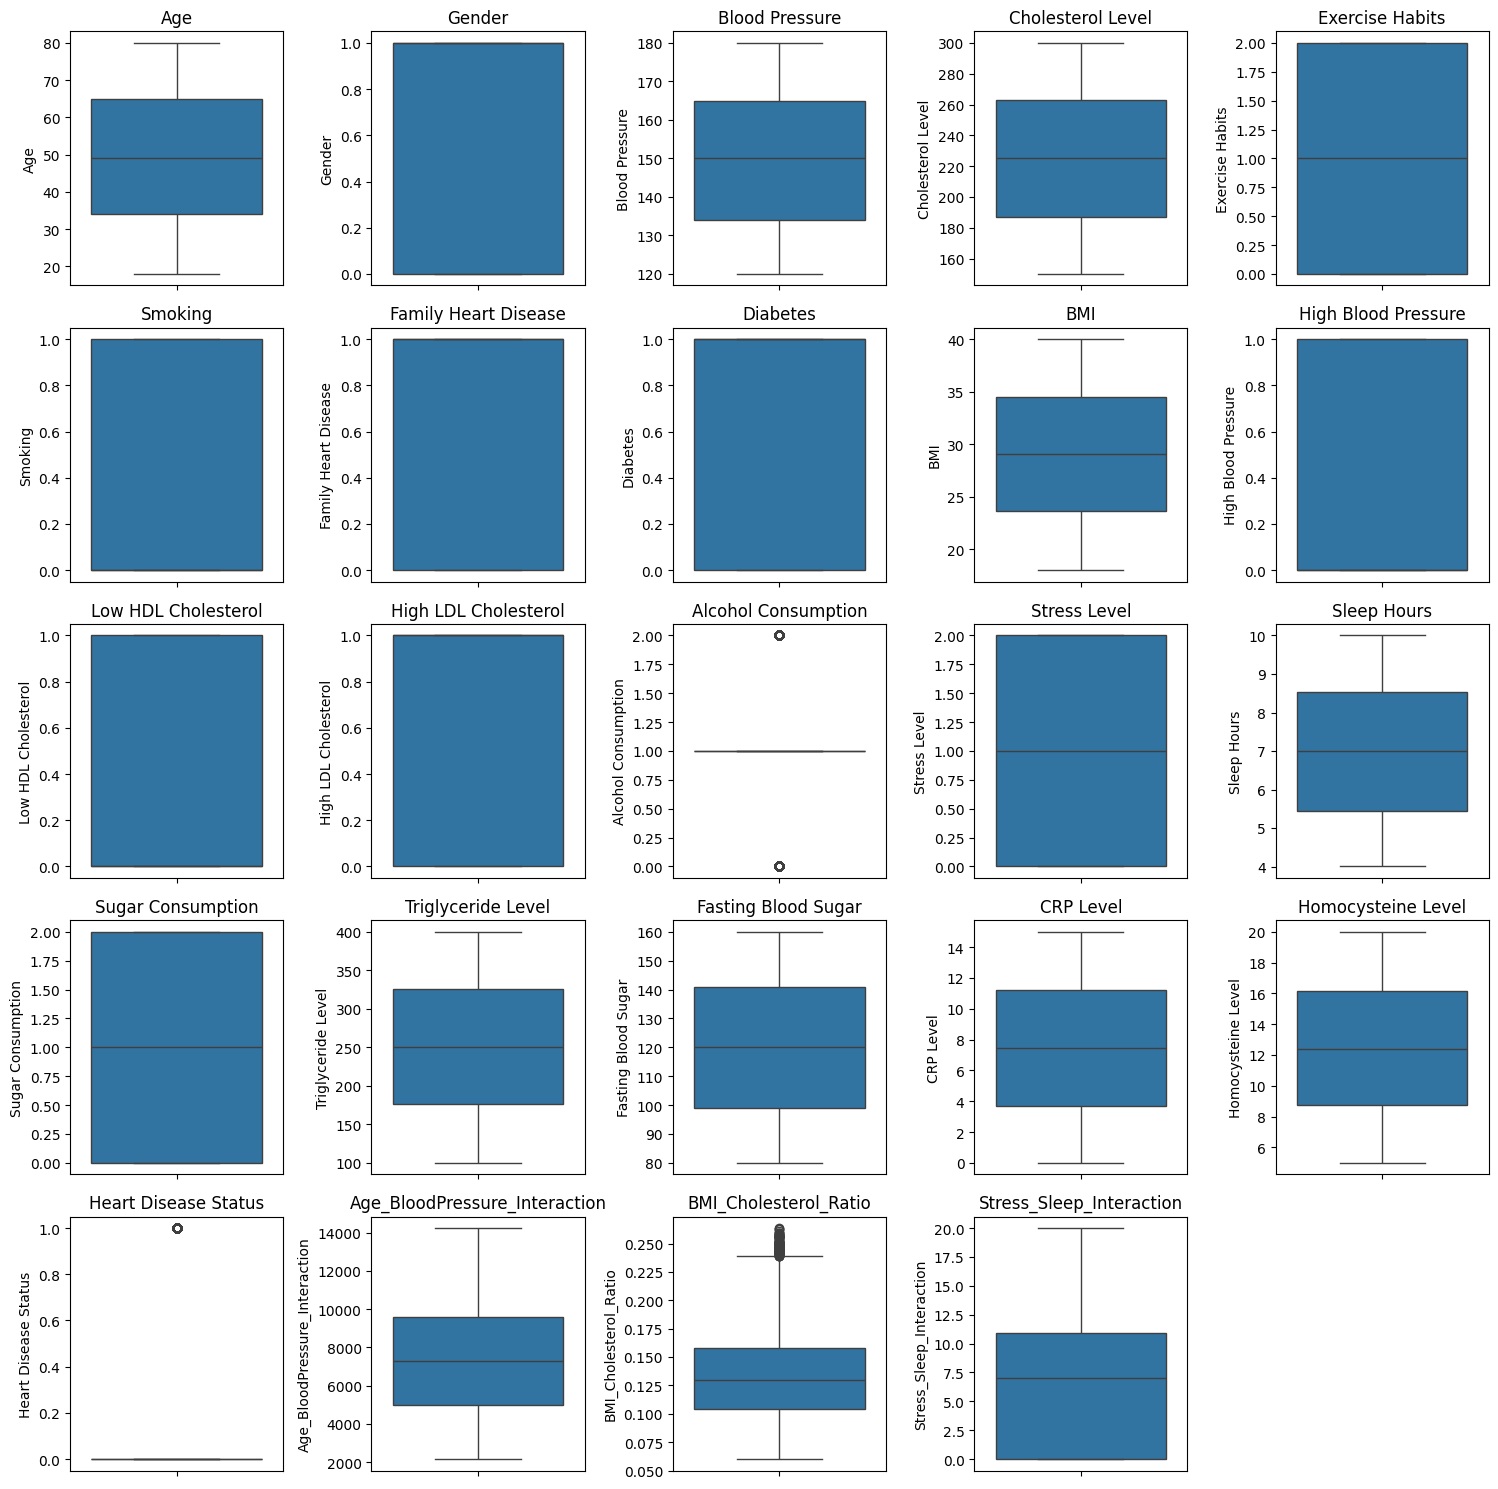

In [34]:
#Plot boxplots for all numerical columns to detect outliers and save original DataFrame shape
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 3))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
original_shape = df.shape

In [35]:
#Detect and remove outliers in numerical columns using the IQR method
for col in df.select_dtypes(include='number'):
    print(f"\nColumn: {col}")

    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5*IQR, Q3 + 1.5*IQR

    before_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"Outliers before removal: {before_count}")

    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

    after_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"Outliers after removal: {after_count}")


Column: Age
Outliers before removal: 0
Outliers after removal: 0

Column: Gender
Outliers before removal: 0
Outliers after removal: 0

Column: Blood Pressure
Outliers before removal: 0
Outliers after removal: 0

Column: Cholesterol Level
Outliers before removal: 0
Outliers after removal: 0

Column: Exercise Habits
Outliers before removal: 0
Outliers after removal: 0

Column: Smoking
Outliers before removal: 0
Outliers after removal: 0

Column: Family Heart Disease
Outliers before removal: 0
Outliers after removal: 0

Column: Diabetes
Outliers before removal: 0
Outliers after removal: 0

Column: BMI
Outliers before removal: 0
Outliers after removal: 0

Column: High Blood Pressure
Outliers before removal: 0
Outliers after removal: 0

Column: Low HDL Cholesterol
Outliers before removal: 0
Outliers after removal: 0

Column: High LDL Cholesterol
Outliers before removal: 0
Outliers after removal: 0

Column: Alcohol Consumption
Outliers before removal: 4676
Outliers after removal: 0

Column:

## Data Visualization

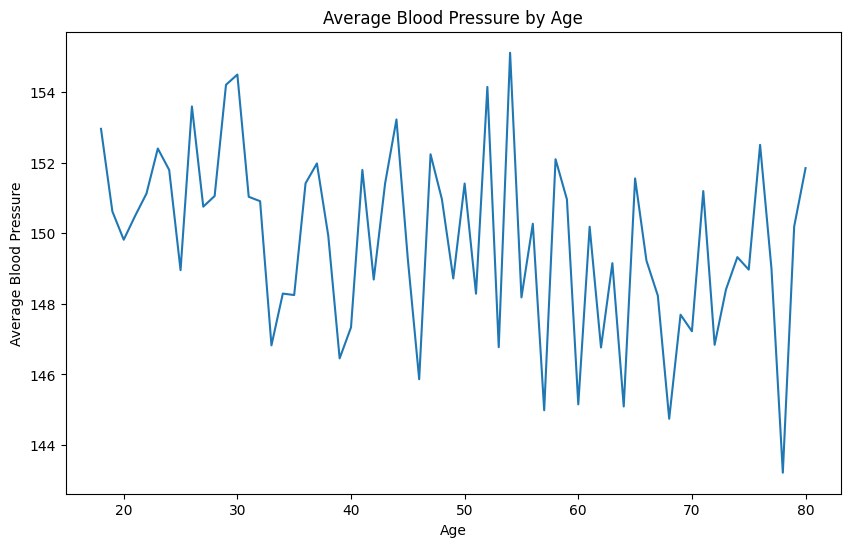

In [37]:
#Plot average blood pressure by age
age_blood_pressure = df.groupby('Age')['Blood Pressure'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(age_blood_pressure['Age'], age_blood_pressure['Blood Pressure'])
plt.title('Average Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Average Blood Pressure')
plt.show()

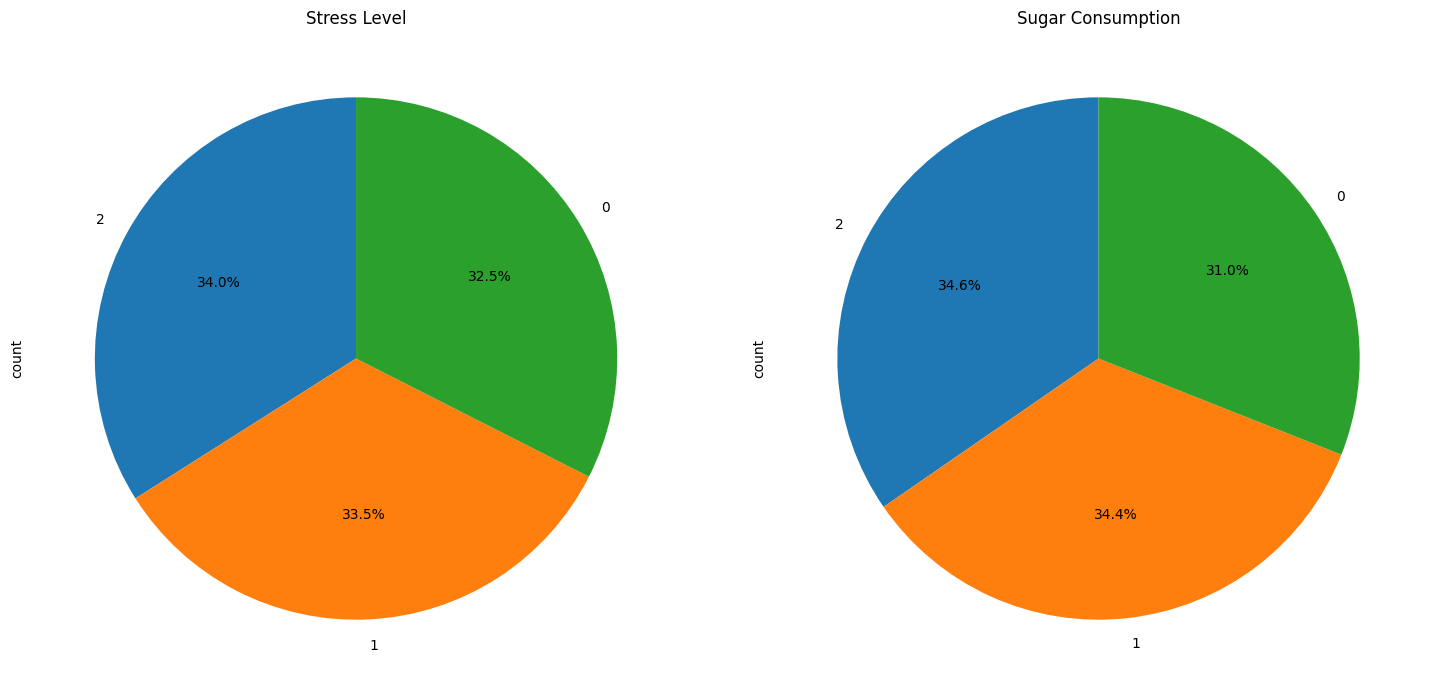

In [38]:
#Plot pie charts for distribution of Stress Level and Sugar Consumption
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes = axes.flatten()

cols_to_plot = ['Stress Level', 'Sugar Consumption']

i = 0
for col in cols_to_plot:
    df[col].value_counts().plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(col)
    i += 1

plt.tight_layout()
plt.show()

## Training-Evaluation Models

In [39]:
#Split data into stratified training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [40]:
#Standardize features using StandardScaler (fit on train, transform on train & test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
#Train a Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
#Evaluate Random Forest model with classification report and confusion matrix
y_pred = model.predict(X_test)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2287
           1       0.00      0.00      0.00       573

    accuracy                           0.80      2860
   macro avg       0.40      0.50      0.44      2860
weighted avg       0.64      0.80      0.71      2860


Confusion Matrix:
 [[2287    0]
 [ 573    0]]


In [43]:
#Calculate and display model accuracy from classification report
report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
accuracy = report['accuracy']
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 79.97%


In [44]:
#Train a K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
#Evaluate KNN model with classification report and confusion matrix
y_pred_knn = knn.predict(X_test)
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn, zero_division=0))
print("\nConfusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      2287
           1       0.20      0.06      0.09       573

    accuracy                           0.76      2860
   macro avg       0.50      0.50      0.48      2860
weighted avg       0.68      0.76      0.71      2860


Confusion Matrix (KNN):
 [[2148  139]
 [ 539   34]]


In [46]:
#Calculate and display KNN model accuracy
report_knn = classification_report(y_test, y_pred_knn, zero_division=0, output_dict=True)
accuracy_knn = report_knn['accuracy']
print(f"KNN Accuracy: {accuracy_knn:.2%}")

KNN Accuracy: 76.29%
